<a href="https://colab.research.google.com/github/YunlouTeng/Spotify-playlists-comparsion-viz/blob/main/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spotipy

In [2]:
import json
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from sklearn.preprocessing import StandardScaler

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#set up spotify api
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="8f2e19ede03a48398e8a41c5b77a015e",
                                               client_secret="e0d473dcf2f243fa9d9119639a57e4a2"))

In [4]:
def get_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        print(i) # Counter
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = sp.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature','speechiness']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = sp.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']],
               'speechiness':[features[0]['speechiness']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [ ]:
#my playlist
df = get_tracks(username='Yunlou',playlist_id = '39PcxlfjCXr1j6pBFnl3yb')

In [6]:
#randomly selected 50 tracks in my playlist
df = df.sample(n=50,random_state = 7)

In [ ]:
#Top50 USA
df2 = get_tracks(username='Spotify',playlist_id = '37i9dQZEVXbLRQDuF5jeBp')

In [ ]:
#Top50 Taiwan
df3 = get_tracks(username='Spotify',playlist_id = '37i9dQZEVXbMnZEatlMSiu')

In [9]:
df['tempo'] = df['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df['loudness'] = df['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df['popularity'] = df['popularity'].apply(lambda x: x/100)
df['tempo'] = df['tempo'].apply(lambda x: x/100)
df['loudness'] = df['loudness'].apply(lambda x: x/100)

In [10]:
df2['tempo'] = df2['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df2['loudness'] = df2['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df2['popularity'] = df2['popularity'].apply(lambda x: x/100)
df2['tempo'] = df2['tempo'].apply(lambda x: x/100)
df2['loudness'] = df2['loudness'].apply(lambda x: x/100)

In [11]:
df3['tempo'] = df3['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df3['loudness'] = df3['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df3['popularity'] = df3['popularity'].apply(lambda x: x/100)
df3['tempo'] = df3['tempo'].apply(lambda x: x/100)
df3['loudness'] = df3['loudness'].apply(lambda x: x/100)

In [12]:
df['playlist'] = "My Playlist"
df2['playlist'] = 'TOP50 USA'
df3['playlist'] = 'TOP50 TAIWAN'

In [13]:
df_final = pd.concat([df,df2,df3], ignore_index = True)

In [14]:
df_final

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness,playlist
0,5nDiawWupkqpF8IxEr4hUk,Always Been You,Jessie Murph,0.69,2022-12-02,0.655,0.572,3,0.872232,0,0.6460,0.000002,0.0774,0.403,0.464455,131825,4,0.0535,My Playlist
1,6jcLKVmEKAQIXIVHJZ8vzS,tình yêu chậm trễ,MONSTAR,0.57,2021-08-01,0.372,0.335,9,0.888949,1,0.8690,0.000000,0.1140,0.387,0.663507,245333,4,0.0286,My Playlist
2,1qEmFfgcLObUfQm0j1W2CK,Late Night Talking,Harry Styles,0.90,2022-05-20,0.714,0.728,10,0.923415,1,0.2980,0.000000,0.1060,0.901,0.355450,177955,4,0.0468,My Playlist
3,2hlM7pRlEJuukvzCsJF6JF,If I Died Last Night,Jessie Murph,0.69,2022-11-04,0.741,0.466,1,0.866282,0,0.4590,0.000000,0.1840,0.331,0.402844,164679,4,0.0862,My Playlist
4,3D2H0RZzOXziswr9UHbpyb,if we never met,John K,0.68,2020-11-12,0.958,0.376,8,0.882282,1,0.1710,0.000000,0.1300,0.331,0.322275,145316,4,0.0523,My Playlist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,OneRepublic,0.95,2022-05-13,0.704,0.797,0,0.901215,1,0.0826,0.000745,0.0546,0.825,0.473934,148486,4,0.0475,TOP50 TAIWAN
146,3V2v19gDm4rmRkMwcgS4X2,有些,颜人中,0.66,2019-12-14,0.685,0.535,7,0.874499,1,0.7440,0.000000,0.0810,0.369,0.407583,229524,4,0.0433,TOP50 TAIWAN
147,4Rt9k4SE8dbfKzngxKJPq9,擱淺,Jay Chou,0.63,2004-08-03,0.497,0.490,5,0.880649,1,0.6710,0.000417,0.1550,0.126,0.393365,236133,4,0.0276,TOP50 TAIWAN
148,6gOZzuHIApHtAPTelkOMUc,Somebody Else,高爾宣 OSN,0.55,2022-12-15,0.779,0.503,10,0.878165,1,0.3200,0.000000,0.0942,0.787,0.355450,169585,4,0.0545,TOP50 TAIWAN


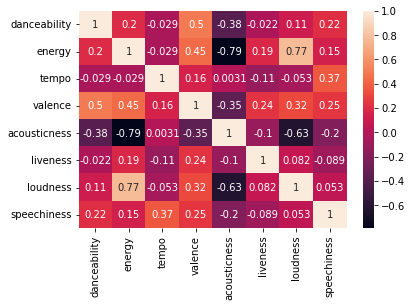

In [15]:
dff = df[['danceability','energy','tempo','valence','acousticness','liveness','loudness','speechiness']]

scaler = StandardScaler()
scaler.fit(dff)
scaled = scaler.fit_transform(dff)
scaled_df = pd.DataFrame(scaled, columns=dff.columns)

sns.heatmap(scaled_df.corr(), annot=True)

In [16]:
df_final.to_excel('spotify_v4.xlsx')